# Titanic Binary Prediction

https://www.kaggle.com/competitions/titanic

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

from matplotlib import pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Train / Test split

In [6]:
y_train = train_data.Survived
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [7]:
X_train = train_data.iloc[:,2:]
X_test = test_data.iloc[:,1:]

In [8]:
# Drop Name, Ticket and Cabin
X_train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
X_test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
X_all = pd.concat([X_train,X_test],ignore_index=True)

In [9]:
X_all.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


## Missing data

In [10]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 71.7+ KB


In [11]:
imp_age = SimpleImputer(missing_values=np.nan, strategy='median')
imp_age.fit(X_all.Age.values.reshape(-1,1))
X_all.Age = imp_age.transform(X_all.Age.values.reshape(-1,1))

In [12]:
imp_embarked = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_embarked.fit(X_all.Embarked.values.reshape(-1,1))
X_all.Embarked = imp_embarked.transform(X_all.Embarked.values.reshape(-1,1))

In [13]:
imp_fare = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_fare.fit(X_all.Fare.values.reshape(-1,1))
X_all.Fare = imp_fare.transform(X_all.Fare.values.reshape(-1,1))

In [14]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 71.7+ KB


## Exploration

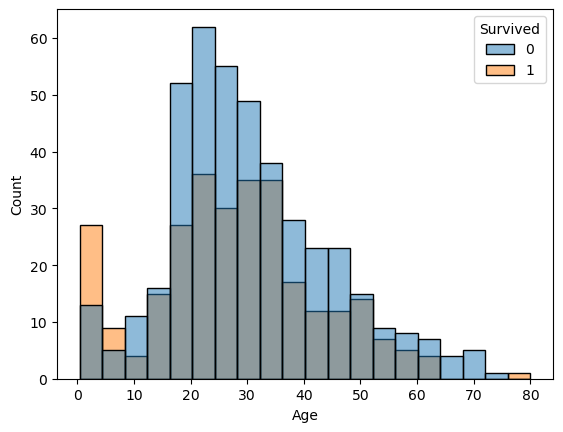

In [15]:
_ = sns.histplot(x='Age', hue='Survived', data=train_data)

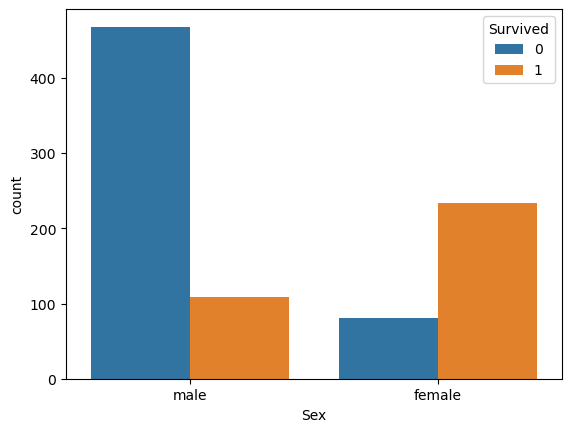

In [16]:
_ = sns.countplot(x='Sex', hue='Survived', data=train_data)

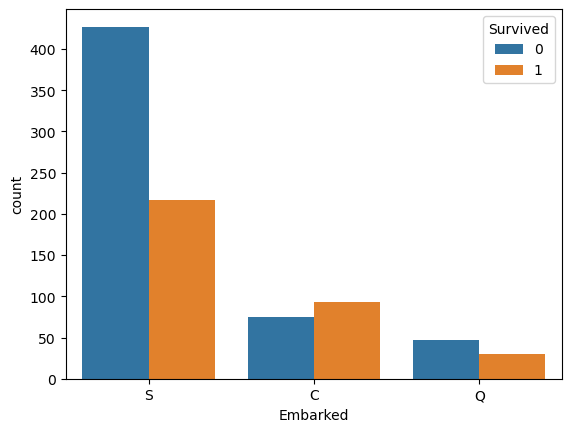

In [17]:
_ = sns.countplot(x='Embarked', hue='Survived', data=train_data)

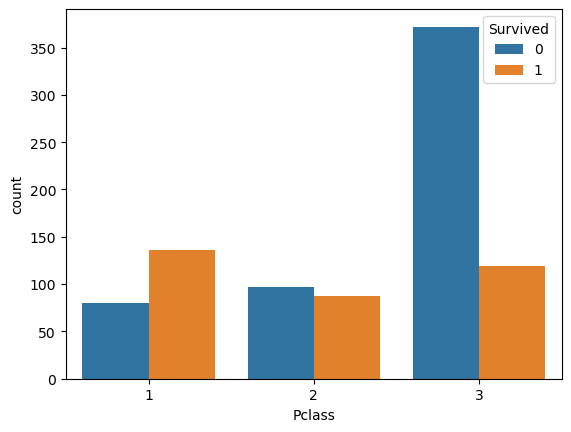

In [18]:
_ = sns.countplot(x='Pclass', hue='Survived', data=train_data)

<AxesSubplot: xlabel='Fare', ylabel='Count'>

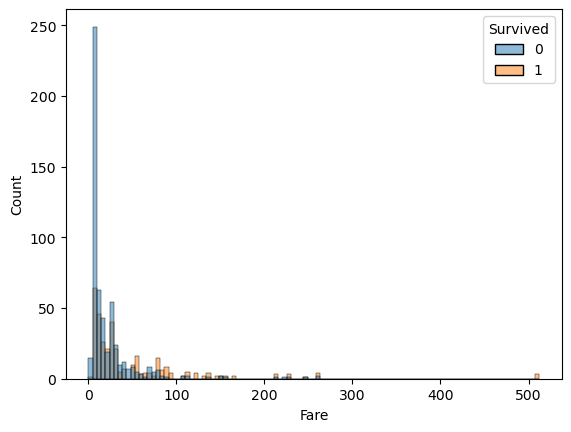

In [19]:
sns.histplot(x='Fare', hue='Survived', data=train_data)

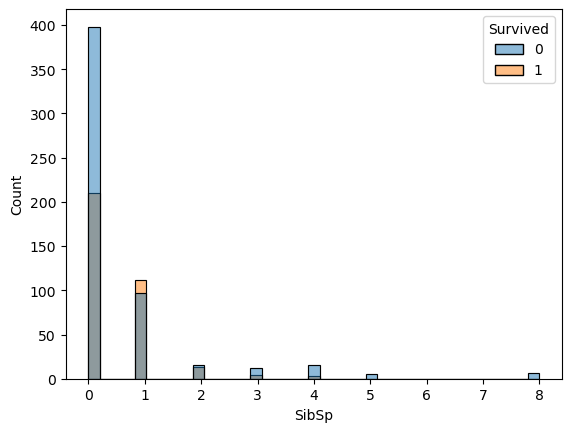

In [20]:
_ = sns.histplot(x='SibSp', hue='Survived', data=train_data)

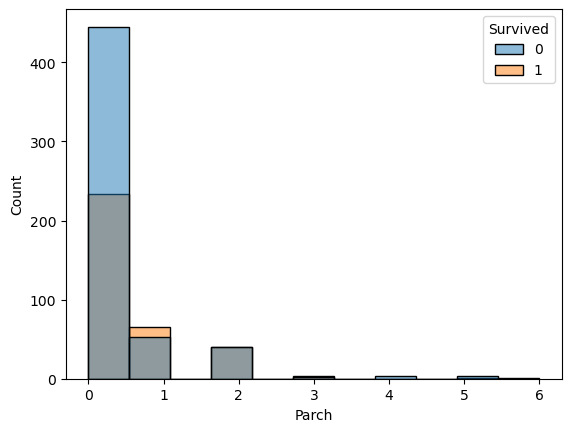

In [21]:
_ = sns.histplot(x='Parch', hue='Survived', data=train_data)

## Encode categorical data and scale continuous data

In [22]:
# On hot encoding of categorical data
X_all = pd.get_dummies(X_all, columns=['Sex', 'Pclass', 'Embarked'], drop_first=True)

In [23]:
X_all

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,8.0500,1,0,1,0,1
1305,39.0,0,0,108.9000,0,0,0,0,0
1306,38.5,0,0,7.2500,1,0,1,0,1
1307,28.0,0,0,8.0500,1,0,1,0,1


## Feature Selection

In [24]:
# First shot: Age, Sex, Class
#X_all = X_all.filter(items=['Age','Sex_male','Pclass_2', 'Pclass_3'])
X_train=X_all[:891]
X_test=X_all[891:]

## Random Forest Model

In [25]:
from sklearn.ensemble import RandomForestClassifier

### Hyperparameter Tuning

In [26]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {#'min_samples_leaf': [400]
              #'min_samples_split': [i+2 for i in range(5)],
              'max_depth': [1, 2, 3, 4, 5],
              #'min_samples_leaf': [n+1 for n in range(1000)]    
              #'max_features': ['sqrt','log2',None],
              #'bootstrap': [True, False],
              #'criterion': ['gini','entropy','log_loss']
             }

In [27]:
clf = RandomForestClassifier(random_state = 1971, n_jobs = -1)

random_search = RandomizedSearchCV(clf,
                           param_distributions=param_dist,
                           n_iter=100,
                           cv=5,
                           scoring='accuracy',
                           random_state=1971,
                           refit = True)
random_search.fit(X_train,y_train)

C:\Users\courtoiv\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=100. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=1971),
                   n_iter=100,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5]},
                   random_state=1971, scoring='accuracy')

In [28]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 5}
Best score is 0.8260561170045821


In [29]:
predictions = random_search.best_estimator_.predict(X_test)

## Save prediction file

In [30]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission_rf.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
